In [28]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import warnings
import os
import sys

In [29]:
# Load the data
rolls = np.load('rolls.npy')
# Split data into train and validation sets
# print(rolls)
split_point = len(rolls) // 2
train_data = rolls[:split_point].reshape(-1, 1)
valid_data = rolls[split_point:].reshape(-1, 1)
# print(train_data)
# Set constant probabilities for the fair die
fair_die_probs = np.array([1/6,1/6,1/6,1/6,1/6,1/6])

# Number of iterations to search for the best emission probabilities
num_iterations = 100

best_model = None
best_score = float('-inf')

In [30]:
np.random.seed(13)
mat = np.random.rand(num_iterations,6)
for iteration in range(num_iterations):
    unfair_die_probs = mat[iteration].copy()
    unfair_die_probs /= unfair_die_probs.sum()
    startprob_init = np.array([1.0,0.0])
    transmat_init = np.array([[0.95,0.05], [0.05, 0.95]])
    emissionprob_init = np.array([fair_die_probs, unfair_die_probs])
    model = hmm.CategoricalHMM(n_components=2,init_params="")
    model.startprob_ = startprob_init
    model.transmat_ = transmat_init
    model.emissionprob_ = emissionprob_init
    model.fit(train_data)
    score = model.score(valid_data)
    
    if score > best_score:
        best_score = score
        best_model = model

print(f"Best Fair Die Probabilities: {fair_die_probs}")
print(f"Best Random Unfair Die Probabilities: {best_model.emissionprob_[1]}")
print(f"Best Model Score on Validation Set: {best_score}")

Best Fair Die Probabilities: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Best Random Unfair Die Probabilities: [0.10057299 0.12112547 0.10642414 0.1048476  0.10759229 0.45943751]
Best Model Score on Validation Set: -43090.35099539459


In [31]:
predicted_states = best_model.predict(rolls.reshape(-1, 1))
switch_sequence = np.diff(predicted_states) != 0
switch_indices = np.where(switch_sequence)[0] + 1

print("Most Likely Sequence of Switching:")
print(switch_indices)

Most Likely Sequence of Switching:
[  337   505   970  1064  1695  1780  2062  2102  2277  2398  2800  2829
  3003  3030  3494  3524  4314  4351  4546  4599  5065  5117  5281  5294
  5603  5687  5820  5848  6484  6565  6763  6851  7579  7659  7722  7745
  7901  7926  8165  8183  8528  8558  8661  8683  9632  9670  9805  9841
 10983 11002 11188 11255 12131 12182 12365 12434 12459 12519 12661 12689
 12714 12738 13000 13025 13294 13332 13895 13919 13945 13983 14078 14132
 14167 14187 14232 14279 14585 14623 14678 14698 15433 15466 15502 15548
 15741 15881 16528 16555 16917 16945 17644 17696 18189 18211 18272 18334
 18448 18511 18603 18670 18825 18853 19574 19607 20226 20283 20851 20877
 21268 21311 21362 21398 21509 21558 22124 22141 22187 22200 22447 22465
 22661 22793 22855 22911 23062 23110 23147 23174 23419 23445 23672 23697
 23803 23819 24241 24317 24407 24424 24665 24680 25027 25073 25580 25614
 25790 25808 26181 26215 26376 26440 26733 26748 26897 26971 27219 27241
 27326 27390 277

(289,)


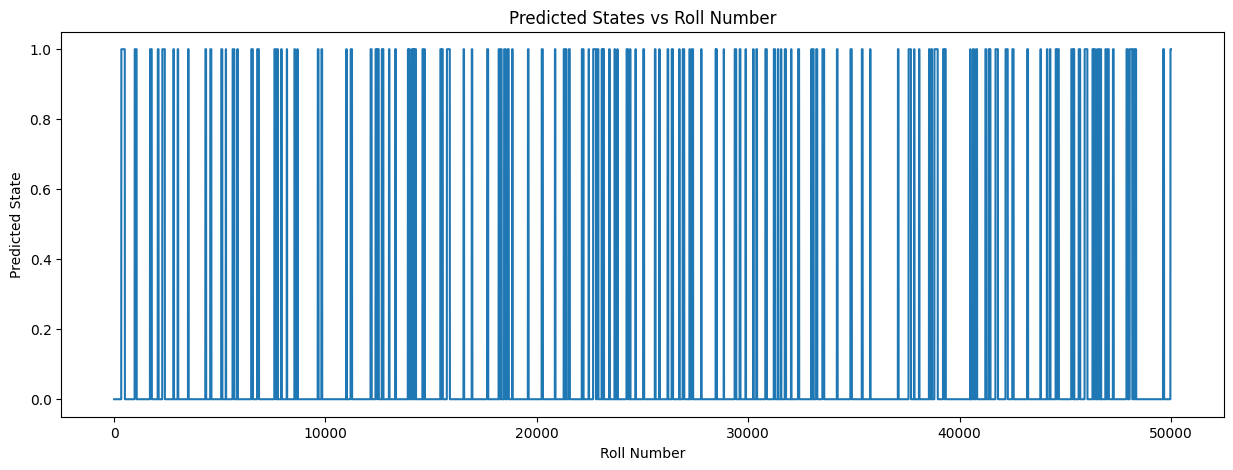

In [32]:
# Predicted states is a binary array where 0 is fair die and 1 is loaded die. Plot predicted states vs the index of the roll using a line graph.
plt.figure(figsize=(15, 5))
print(switch_indices.shape)
plt.plot(predicted_states)
plt.title("Predicted States vs Roll Number")
plt.xlabel("Roll Number")
plt.ylabel("Predicted State")
plt.show()



## Hidden Markov Models and the Decoding Problem

The task at hand corresponds to the decoding problem in Hidden Markov Models (HMM). The decoding problem involves finding the most likely sequence of hidden states given the observed data. This concept aligns precisely with what was accomplished in Task 2.

### Decoding Problem in HMMs

In the decoding problem, the objective is to uncover the underlying sequence of hidden states that best explains the observed data. This is achieved by analyzing the observed sequence of rolls and determining the most likely transitions between hidden states (fair die or loaded die).

### Task 2: Applying the Decoding Problem

In Task 2, the analysis focused on using an HMM to estimate the sequence of hidden states (fair die or loaded die) based on the observed rolls at the casino. By training the HMM and leveraging its parameters, including the transition matrix, the code determined the most likely sequence of hidden states that could generate the observed data.


# 3.4.3

In [34]:
transition_matrix = best_model.transmat_.copy()

fair_to_loaded_prob = transition_matrix[0, 1]

loaded_to_fair_prob = transition_matrix[1, 0]

print(f"Probability of switching from Fair to Loaded Die: {fair_to_loaded_prob}")
print(f"Probability of switching from Loaded to Fair Die: {loaded_to_fair_prob}")

Probability of switching from Fair to Loaded Die: 0.04877383442407133
Probability of switching from Loaded to Fair Die: 0.0933200127012488


## Hidden Markov Models and Encoding

The task at hand corresponds to the encoding problem in Hidden Markov Models (HMM). The encoding problem involves determining the most likely sequence of observations given a sequence of hidden states. In the context of this task:

1. **Transition Probabilities:**
   - The transition matrix (`transmat_`) of the trained HMM provides insights into the likelihood of switching between states. Specifically, `transmat_[0, 1]` represents the probability of transitioning from the fair die to the loaded die, and `transmat_[1, 0]` represents the probability of transitioning from the loaded die to the fair die.
   - By analyzing these transition probabilities, we can infer how often the casino is switching between the fair and loaded die.

2. **Encoding Problem:**
   - The overall task corresponds to the **encoding problem** in HMMs. This problem involves determining the most likely sequence of observations (rolls) given the underlying sequence of hidden states (fair die or loaded die).
   - The HMM is trained to model the transitions between hidden states based on the observed sequence of rolls. The most likely sequence of observations, obtained through encoding, provides insights into how well the HMM can explain the observed data based on the estimated hidden states.

In summary, the HMM allows us to analyze the switching behavior of the casino and estimate the most likely sequence of observed rolls given the underlying hidden states.


# 3.4.4

In [35]:
loaded_die_emission_probs = best_model.emissionprob_[1].copy()

most_likely_outcome = np.argmax(loaded_die_emission_probs) + 1  

print(f"The loaded die is biased towards rolling the number: {most_likely_outcome}")
print(f"Loaded Die Emission Probabilities: {loaded_die_emission_probs}")




The loaded die is biased towards rolling the number: 6
Loaded Die Emission Probabilities: [0.10057299 0.12112547 0.10642414 0.1048476  0.10759229 0.45943751]


## Hidden Markov Models and Bias in the Loaded Die

The task involves using a Hidden Markov Model (HMM) to examine the bias in a loaded die. Specifically:

1. **Examination of Bias:**
   - Maximum probability of any number in a fair die is 1/6. But here, the loaded die is heavily biased towards one number (as inferred from the emission probabilities)
   - The bias in the loaded die is analyzed through the emission probabilities associated with the loaded die state. These probabilities indicate the likelihood of observing each outcome (number on the die) when the die is loaded.
   - The code accesses the emission probabilities for the loaded die from the trained HMM and identifies the most likely outcome with the highest emission probability. This provides insights into which number the loaded die is biased towards rolling.

2. **Parameter Estimation Problem in HMM:**
   - The task corresponds to the **parameter estimation problem** in Hidden Markov Models. This problem involves estimating the parameters of the model, particularly the emission probabilities for each state.
   - In this context, the goal is to determine how the loaded die is biased by examining the emission probabilities associated with each face of the die when it is in the loaded state. The most likely outcome indicates the bias towards a specific number.

In summary, the HMM is used to estimate the bias in the loaded die by analyzing the emission probabilities associated with the loaded die state.
